In [2]:
# import all libaries 
import pandas as pd 
import numpy as np  
import matplotlib as mpl
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  

sns.set_theme()

import shap 
import os
# scaling 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier 

from xgboost import XGBClassifier 

# metrics 
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,
                             roc_auc_score,roc_curve,
                             ConfusionMatrixDisplay,
                             recall_score,precision_score,f1_score)

from sklearn.pipeline import Pipeline  

# for tuning the model 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import scipy.stats as stats 
import warnings 
warnings.filterwarnings('ignore')





In [3]:
# set the color 

# Clean visual theme
sns.set_theme(style="darkgrid")

# Custom colors for prediction models
model_colors = {
    "Logistic Regression": "#0074D9",   # Blue
    "Decision Tree": "#2ECC40",        # Green
    "Random Forest": "#FF851B",        # Orange
    "Gradient Boosting": "#B10DC9",    # Purple
    "XGBoost": "#FF4136",              # Red
    "LightGBM": "#39CCCC",             # Teal
    "CatBoost": "#FFDC00",             # Yellow
    "KNN": "#7FDBFF",                  # Light Blue
    "SVM": "#85144b",                  # Maroon
    "Naive Bayes": "#3D9970"           # Olive Green
}

# Apply color palette globally
sns.set_palette(list(model_colors.values()))

# Set background and grid colors for better visual contrast
mpl.rcParams['figure.facecolor'] = '#f8f9fa'   # Light background
mpl.rcParams['axes.facecolor'] = '#ffffff'     # White plot area
mpl.rcParams['axes.edgecolor'] = '#dee2e6'     # Light grey border
mpl.rcParams['grid.color'] = '#e9ecef'         # Soft gridlines


sns.set_palette("Set2")       # Soft and clean
sns.set_palette("pastel")     # Light & pleasing
sns.set_palette("deep")       # Bold & default
sns.set_palette("muted")      # Professional & subtle
sns.set_palette("colorblind") # High accessibility
sns.set_palette("dark")       # Dark & moody
sns.set_palette("rocket")     # Modern & vibrant
sns.set_palette("crest")      # Warm & inviting
sns.set_palette("cubehelix") # Sequential & elegant

# Set the style of the plots
# plt.style.use('seaborn-whitegrid')  # Clean and professional
plt.rcParams['axes.titlesize'] = 14  # Title font size
plt.rcParams['axes.labelsize'] = 12  # Axis label font size
plt.rcParams['xtick.labelsize'] = 10  # X-tick label font size
plt.rcParams['ytick.labelsize'] = 10  # Y-tick label font size
plt.rcParams['legend.fontsize'] = 10  # Legend font size
plt.rcParams['figure.figsize'] = (10, 6)  # Default figure size
plt.rcParams['figure.dpi'] = 100  # High resolution

# Set the random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# set the font style
plt.rcParams['font.family'] = 'Arial'  # Change to your desired font
plt.rcParams['font.size'] = 12  # Default font size
plt.rcParams['font.weight'] = 'normal'  # Font weight

In [4]:
# load the datsets 
df=pd.read_csv("../loan_prediction.csv")

df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
(df.isna().sum())/len(df)*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [8]:
df.skew(numeric_only=True)

BAD        1.504317
LOAN       2.023781
MORTDUE    1.814481
VALUE      3.053344
YOJ        0.988460
DEROG      5.320870
DELINQ     4.023150
CLAGE      1.343412
NINQ       2.621984
CLNO       0.775052
DEBTINC    2.852353
dtype: float64

In [9]:
# duplicated values 
df.duplicated().sum()

0

In [10]:
# impute the missing values 
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [11]:
categorial_columns=df.select_dtypes(include='object').columns.tolist()
df[categorial_columns]

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Other
3,NaN,NaN
4,HomeImp,Office
...,...,...
5955,DebtCon,Other
5956,DebtCon,Other
5957,DebtCon,Other
5958,DebtCon,Other


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [13]:
df.isna().sum()
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


# Univariate Analysis 

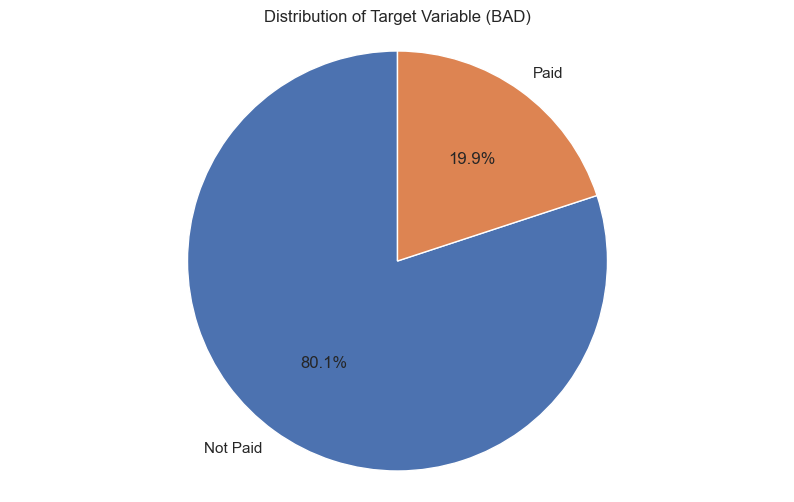

In [14]:
values_data=df['BAD'].value_counts(normalize=True)
sns.set_theme(style='dark')  # Set the color palette to pastel
plt.pie(values_data,labels=['Not Paid','Paid'],autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Target Variable (BAD)') 
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Feature: LOAN
Skewness: 2.02
Mean: 18607.97


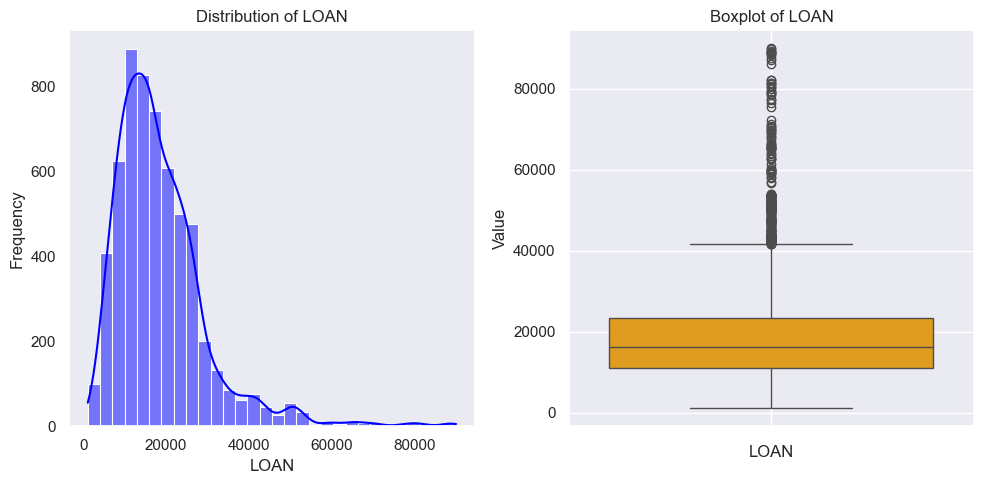

Feature: MORTDUE
Skewness: 1.81
Mean: 73760.82


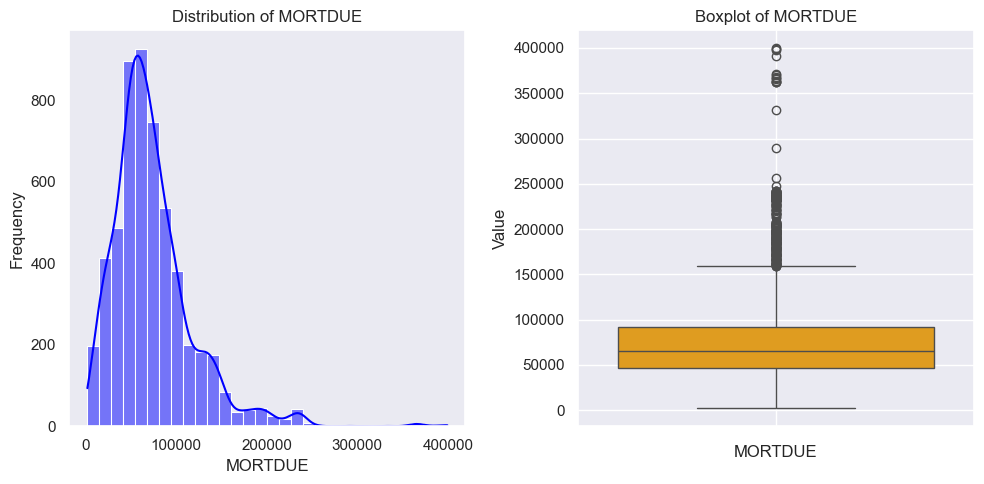

Feature: VALUE
Skewness: 3.05
Mean: 101776.05


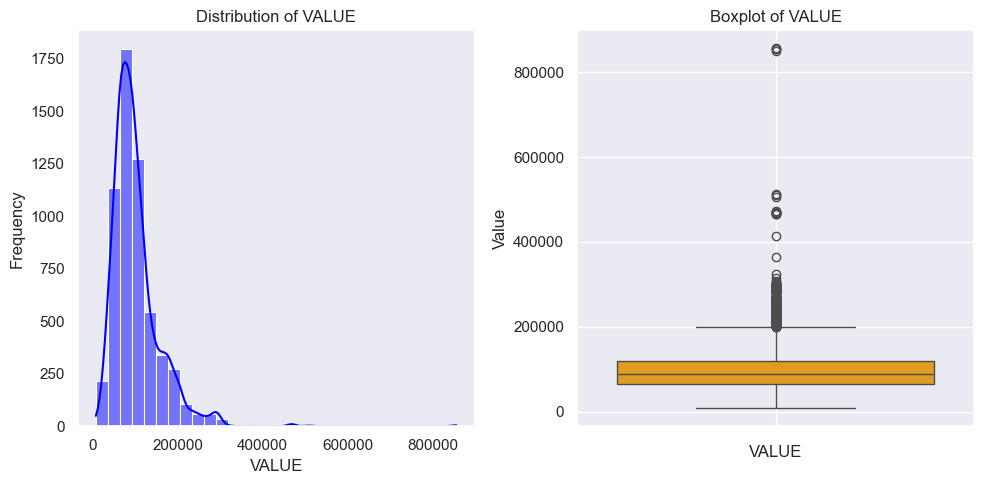

Feature: YOJ
Skewness: 0.99
Mean: 8.92


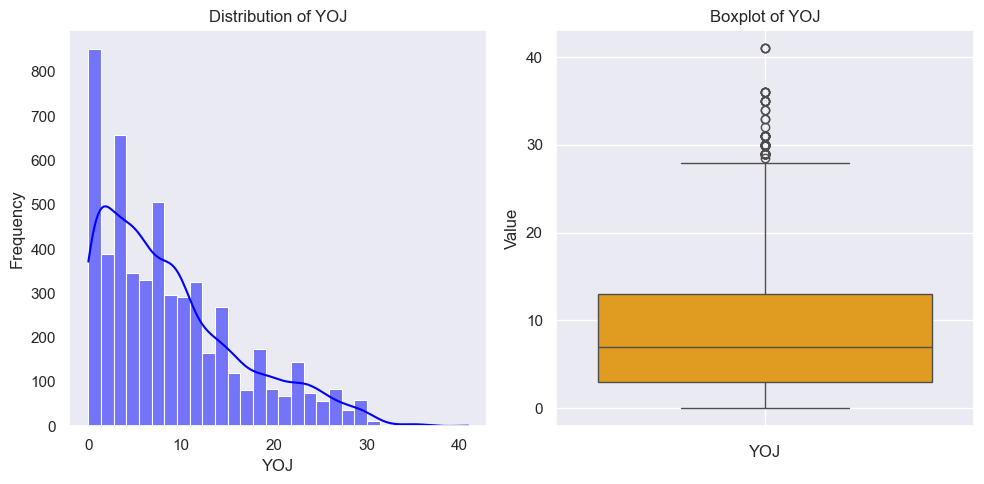

Feature: DEROG
Skewness: 5.32
Mean: 0.25


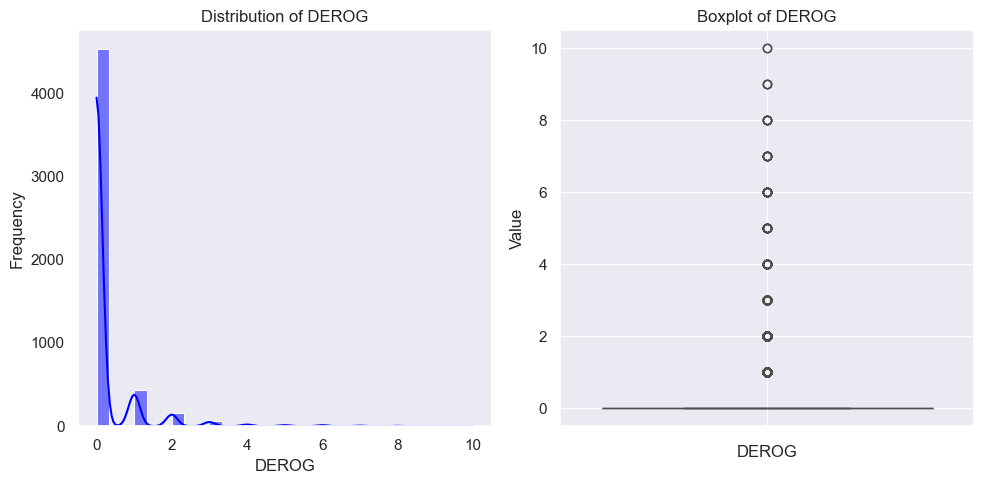

Feature: DELINQ
Skewness: 4.02
Mean: 0.45


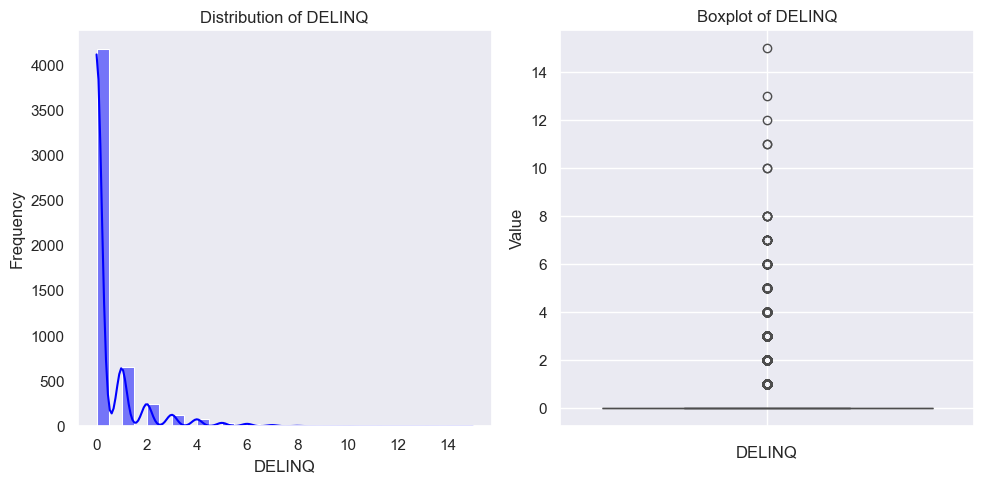

Feature: CLAGE
Skewness: 1.34
Mean: 179.77


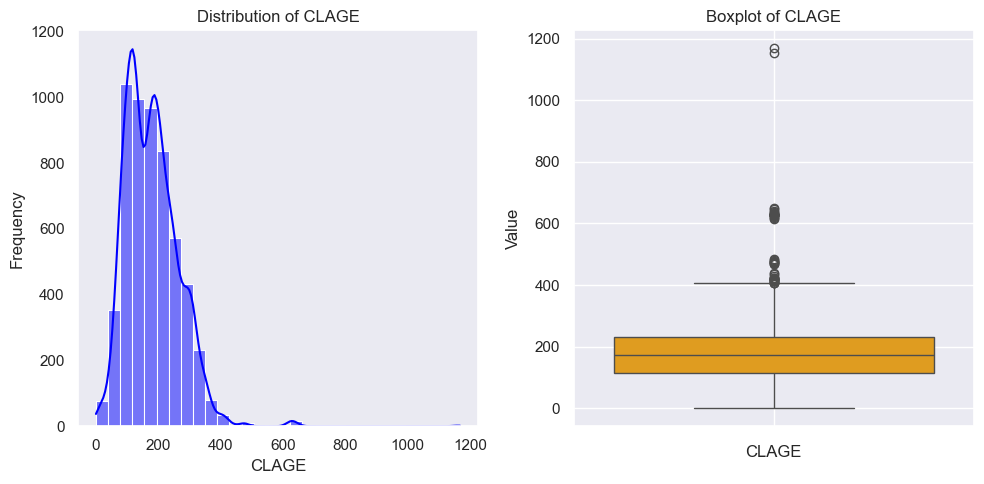

Feature: NINQ
Skewness: 2.62
Mean: 1.19


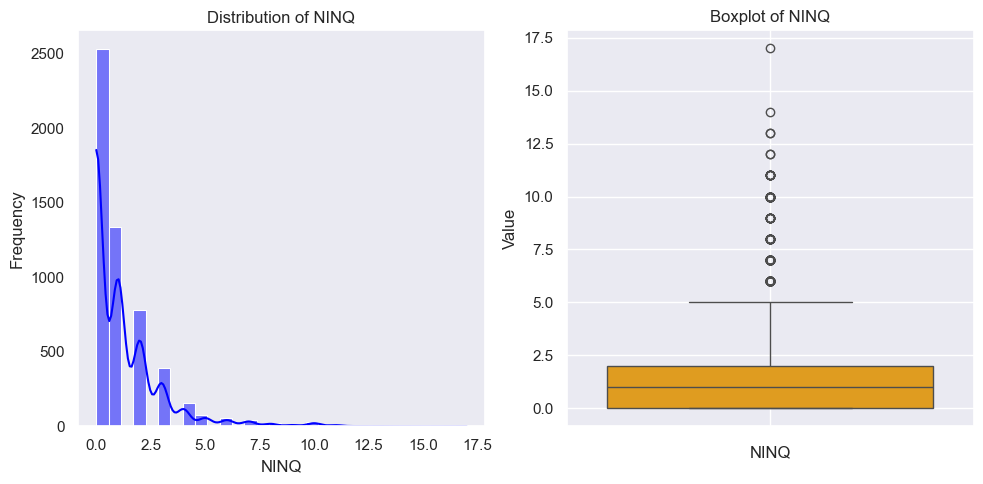

Feature: CLNO
Skewness: 0.78
Mean: 21.3


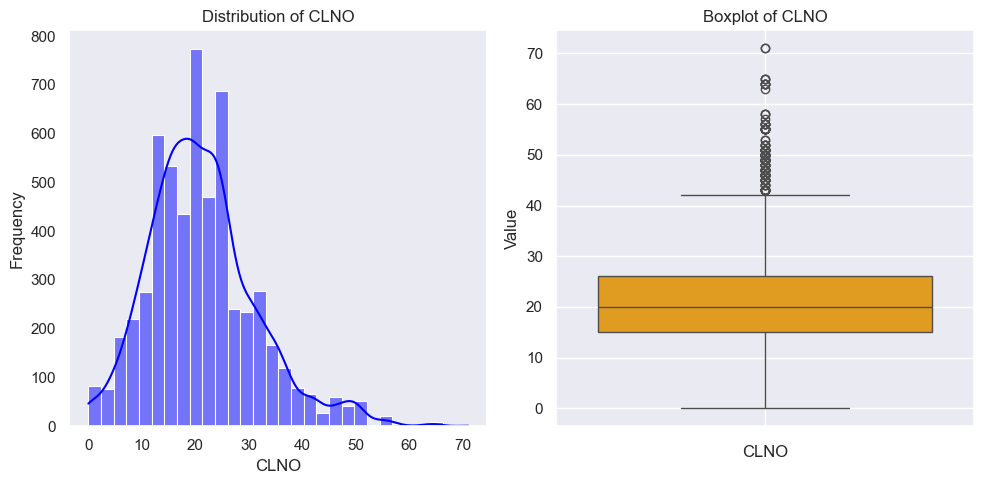

Feature: DEBTINC
Skewness: 2.85
Mean: 33.78


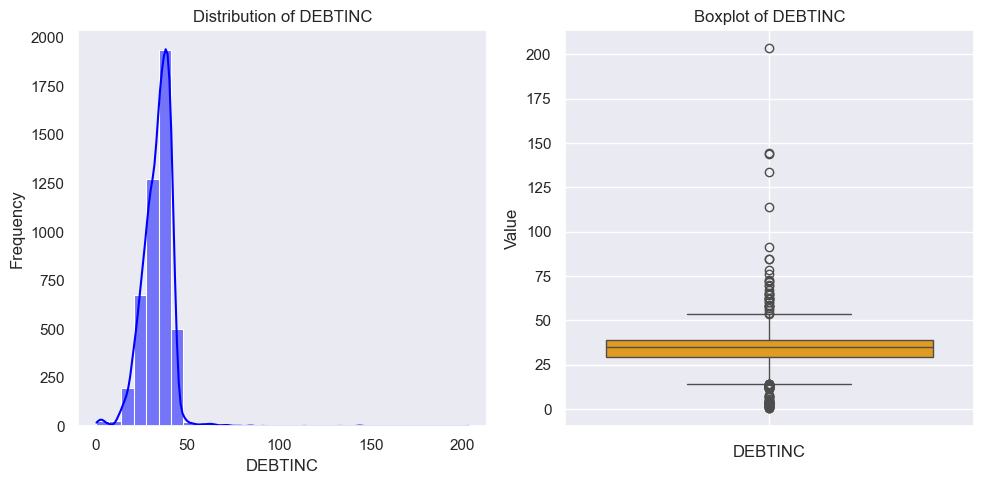

In [15]:
numeric_columns=df.select_dtypes(include='number').columns.tolist()
numeric_columns.remove('BAD')
numeric_columns

# check the distribution of the numeric columns
for feature in numeric_columns:
    print(f"Feature: {feature}")
    print(f"Skewness: {round(df[feature].skew(),2)}")
    print(f"Mean: {round(df[feature].mean(),2)}")
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    sns.boxplot(y=df[feature],color='orange')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    


# Bivariate Analyis 

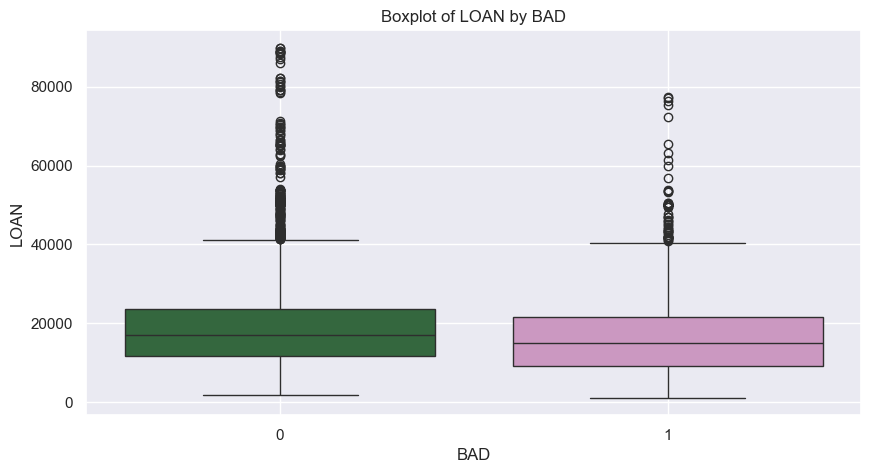

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='BAD',y='LOAN',data=df,palette='cubehelix')
plt.title('Boxplot of LOAN by BAD')
plt.xlabel('BAD')
plt.ylabel('LOAN')
plt.grid(True)
plt.show()

# Multivariate Analysis 

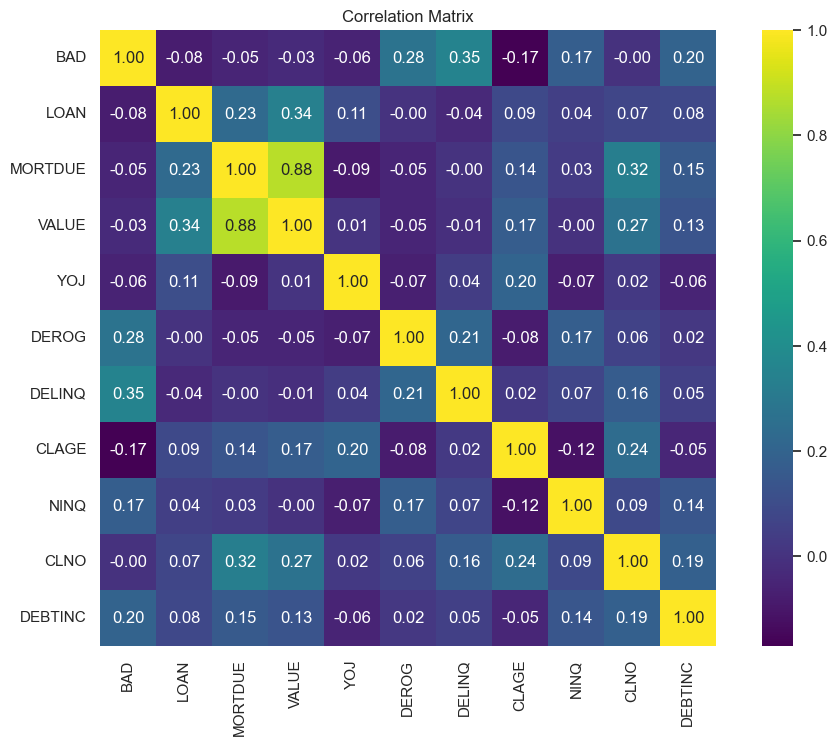

In [17]:
correlation_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

In [18]:
df = df.fillna(value={
    'MORTDUE': df['MORTDUE'].median(),
    'VALUE': df['VALUE'].median(),
    'YOJ': df['YOJ'].median(),
    'DEROG': df['DEROG'].median(),
    'DELINQ': df['DELINQ'].median(),
    'CLAGE': df['CLAGE'].median(),
    'NINQ': df['NINQ'].median(),
    'CLNO': df['CLNO'].median(),
    'DEBTINC': df['DEBTINC'].median()
})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [19]:
df['REASON']=df['REASON'].fillna('Not Specified')
df['JOB']=df['JOB'].fillna('No Job')

In [20]:
df.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [21]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,Not Specified,No Job,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [22]:
# statistics of thenumerical columns 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5960.0,73001.041812,42552.726779,2063.000000,48139.000000,65019.000000,88200.250000,399550.000000
VALUE,5960.0,101540.387423,56869.436682,8000.000000,66489.500000,89235.500000,119004.750000,855909.000000
YOJ,5960.0,8.756166,7.259424,0.000000,3.000000,7.000000,12.000000,41.000000
DEROG,5960.0,0.224329,0.798458,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5960.0,0.405705,1.079256,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5960.0,179.440725,83.574697,0.000000,117.371430,173.466667,227.143058,1168.233561
NINQ,5960.0,1.170134,1.653866,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5960.0,21.247819,9.951308,0.000000,15.000000,20.000000,26.000000,71.000000


In [23]:
# stastics of the categorical columns
df.describe(include='object').T

,count,unique,top,freq
REASON,5960,3,DebtCon,3928
JOB,5960,7,Other,2388


In [24]:

num_columns=df.select_dtypes(include='number').columns.tolist()
num_columns.remove('BAD')
# handle the ouliers values  
for feature in num_columns:
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1 
    LW=Q1-(1.5*IQR)
    HW=Q3+(1.5*IQR)
    df[feature]=np.where(df[feature]<LW,LW,df[feature])
    df[feature]=np.where(df[feature]>HW,HW,df[feature])
    
    

In [25]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500.0,65019.0,89235.5,Not Specified,No Job,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,41600.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,41600.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,41600.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [26]:
df.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [28]:
# save the cleaned data
df.to_csv('cleaned_loan_predictions.csv',index=False)